## Exploratory Data Analysis (EDA)
In this section, I explore the trends and patterns in our cleaned Board Games data file to better understand popularity, longevity and quality of games.

Below is a reminder of what our data set now looks like:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('Boardgames_SQL_Cleaned_File.csv') 

# Create new column "Adjusted Release year"
df['Adjusted Release Year'] = df['Release Year'].apply(lambda x: 2001 if x < 2001 else x)

# Calculate the number of years since the games adjusted release year
df['Years Since Release'] = 2024 - df['Adjusted Release Year']

# Avoid division by 0
df['Years Since Release'] = df['Years Since Release'].replace(0,1)

# Calculate votes per year rounded to nearest whole number
df['Votes per Adjusted Release Year'] = df['Voters'] / df['Years Since Release']
df['Votes per Adjusted Release Year'] = df ['Votes per Adjusted Release Year'].round(0).astype(int)

# Calculate the standard deviation on Votes per Adjusted Release Year and apply it as a weighting column
mean_votes = df['Votes per Adjusted Release Year'].mean()
std_dev_votes = df['Votes per Adjusted Release Year'].std(ddof=0)
df['SDs from Mean'] = (df['Votes per Adjusted Release Year'] - mean_votes) / std_dev_votes
df['SD Weight'] = 1 / ((df['SDs from Mean'].abs() + 1))
df['Weighted Result'] = df['Votes per Adjusted Release Year'] * df['SD Weight']
df['Weighted Result'] = df['Weighted Result'].round(2)

# Normalised Weighted Results on a scale of -1 to 1 and name it Popularity
min_sd = df['Weighted Result'].min()
max_sd = df['Weighted Result'].max()
df['Popularity'] = 2 * ((df['Weighted Result'] - min_sd) / (max_sd - min_sd)) - 1
df['Popularity'] = df['Popularity'].round(2)

# Normalised Geek Rating on a scale of -1 to 1 and name it Quality
min_sd = df['Geek Rating'].min()
max_sd = df['Geek Rating'].max()
df['Quality'] = 2 * ((df['Geek Rating'] - min_sd) / (max_sd - min_sd)) - 1
df['Quality'] = df['Quality'].round(2)

# Add a column called score
df['Score'] = df['Popularity'] + df['Quality']

# Sort by most votes per adjusted release year
df_sorted = df.sort_values(by='Votes per Adjusted Release Year', ascending=False)

# Show the top 10 rows
df_sorted.head(10)

,Rank,Game ID,Title,Description,Release Year,Geek Rating,Avg Rating,Voters,Adjusted Release Year,Years Since Release,Votes per Adjusted Release Year,SDs from Mean,SD Weight,Weighted Result,Popularity,Quality,Score
31,32,266192,Wingspan,Attract a beautiful and diverse collection of ...,2019,7.879,8.03,100230,2019,5,20046,33.254458,0.029193,585.21,1.00,0.77,1.77
191,197,350184,Earth,Strategically grow your ecosystem card engine ...,2023,7.356,7.65,16840,2023,1,16840,27.897978,0.034604,582.74,0.99,0.54,1.53
2,3,342942,Ark Nova,"Plan and build a modern, scientifically manage...",2021,8.342,8.53,49624,2021,3,16541,27.398418,0.035213,582.46,0.99,0.97,1.96
39,40,373106,Sky Team,Pilot and co-pilot work together to land planes.,2023,7.815,8.18,16465,2023,1,16465,27.271440,0.035371,582.39,0.99,0.74,1.73
48,49,295947,Cascadia,Create the most harmonious ecosystem as you pu...,2021,7.758,7.93,44767,2021,3,14922,24.693446,0.038920,580.77,0.98,0.72,1.70
40,41,366013,Heat: Pedal to the Metal,Manage your race car's speed to keep from over...,2022,7.799,8.03,29490,2022,2,14745,24.397720,0.039374,580.56,0.98,0.73,1.71
81,83,230802,Azul,Artfully embellish the walls of your palace by...,2017,7.626,7.74,96691,2017,7,13813,22.840565,0.041945,579.39,0.98,0.66,1.64
6,7,167791,Terraforming Mars,Compete with rival CEOs to make Mars habitable...,2016,8.204,8.35,104081,2016,8,13010,21.498939,0.044447,578.25,0.98,0.91,1.89
102,105,371942,The White Castle,Become the most influential clan in Japan's Hi...,2023,7.560,7.99,12821,2023,1,12821,21.183164,0.045079,577.96,0.98,0.63,1.61
5,6,316554,Dune: Imperium,"Influence, intrigue, and combat in the univers...",2020,8.228,8.43,50373,2020,4,12593,20.802229,0.045867,577.60,0.97,0.92,1.89


In [2]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25795 entries, 0 to 25794
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Rank                             25795 non-null  int64  
 1   Game ID                          25795 non-null  int64  
 2   Title                            25795 non-null  object 
 3   Description                      14193 non-null  object 
 4   Release Year                     25795 non-null  int64  
 5   Geek Rating                      25795 non-null  float64
 6   Avg Rating                       25795 non-null  float64
 7   Voters                           25795 non-null  int64  
 8   Adjusted Release Year            25795 non-null  int64  
 9   Years Since Release              25795 non-null  int64  
 10  Votes per Adjusted Release Year  25795 non-null  int64  
 11  SDs from Mean                    25795 non-null  float64
 12  SD Weight         

,Rank,Game ID,Release Year,Geek Rating,Avg Rating,Voters,Adjusted Release Year,Years Since Release,Votes per Adjusted Release Year,SDs from Mean,SD Weight,Weighted Result,Popularity,Quality,Score
count,25795.000000,25795.000000,25795.000000,25795.000000,25795.000000,25795.000000,25795.000000,25795.000000,25795.000000,2.579500e+04,25795.000000,25795.000000,25795.000000,25795.000000,25795.000000
mean,13875.355263,150777.912309,2007.309672,5.676895,6.439024,999.598721,2011.943826,12.056174,142.297228,1.762928e-17,0.811621,62.191974,-0.789818,-0.196870,-0.986688
std,8167.152892,125719.032552,38.832680,0.356542,0.909714,4354.571290,7.598720,7.598720,598.538951,1.000019e+00,0.122368,110.515951,0.378192,0.156325,0.520598
min,1.000000,1.000000,400.000000,3.845000,1.260000,30.000000,2001.000000,1.000000,1.000000,-2.360748e-01,0.029193,0.810000,-1.000000,-1.000000,-1.500000
25%,6699.500000,18745.500000,2004.000000,5.509000,5.880000,57.000000,2004.000000,5.000000,5.000000,-2.293917e-01,0.812306,4.070000,-0.990000,-0.270000,-1.260000
50%,13803.000000,148434.000000,2014.000000,5.539000,6.480000,132.000000,2014.000000,10.000000,16.000000,-2.110133e-01,0.820098,13.210000,-0.960000,-0.260000,-1.210000
75%,21059.500000,256874.500000,2019.000000,5.662000,7.050000,441.000000,2019.000000,20.000000,61.000000,-1.358288e-01,0.846783,53.710000,-0.820000,-0.200000,-1.020000
max,27898.000000,433444.000000,2023.000000,8.407000,9.840000,132623.000000,2023.000000,23.000000,20046.000000,3.325446e+01,0.999504,585.210000,1.000000,1.000000,1.960000


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


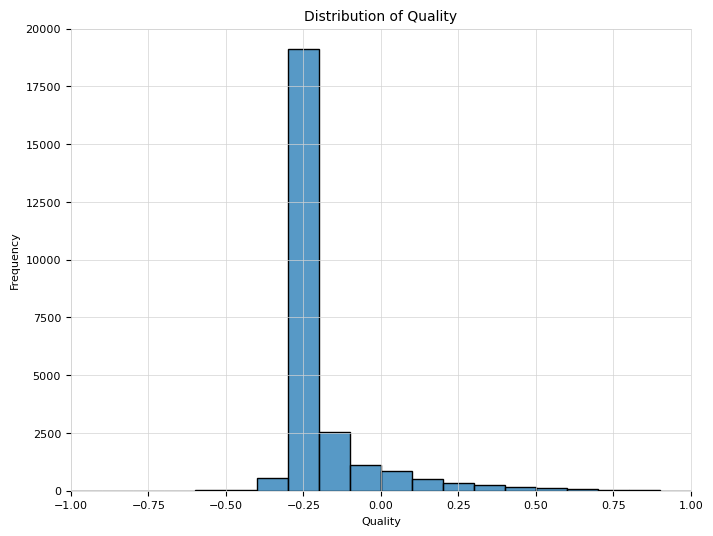

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Quality'], bins=20)

# Set the x-axis range
plt.xlim(-1, 1)
plt.ylim(0, 20000)

# Customize the gridlines
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)

# Customize the plot border
plt.gca().spines['top'].set_color('lightgrey')
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_color('lightgrey')
plt.gca().spines['right'].set_linewidth(0.5)
plt.gca().spines['left'].set_color('lightgrey')
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_color('lightgrey')
plt.gca().spines['bottom'].set_linewidth(0.5)

# Set smaller font sizes
plt.title('Distribution of Quality', fontsize=10)
plt.xlabel('Quality', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


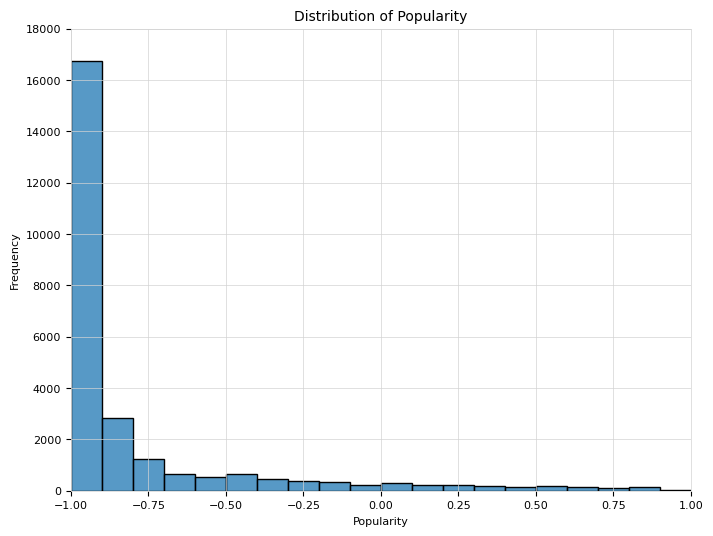

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Popularity'], bins=20)

# Set the x-axis range
plt.xlim(-1, 1)
plt.ylim(0, 18000)

# Customize the gridlines
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)

# Customize the plot border
plt.gca().spines['top'].set_color('lightgrey')
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_color('lightgrey')
plt.gca().spines['right'].set_linewidth(0.5)
plt.gca().spines['left'].set_color('lightgrey')
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_color('lightgrey')
plt.gca().spines['bottom'].set_linewidth(0.5)

# Set smaller font sizes
plt.title('Distribution of Popularity', fontsize=10)
plt.xlabel('Popularity', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

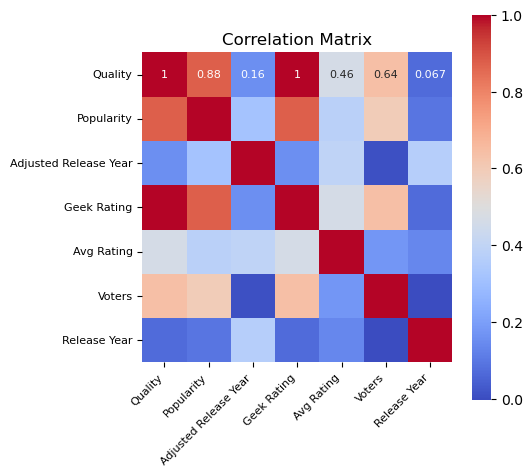

In [5]:

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
df_corr = df[['Quality', 'Popularity', 'Adjusted Release Year', 'Geek Rating', 'Avg Rating', 'Voters', 'Release Year']].corr()

# Create a larger figure to accommodate all labels
plt.figure(figsize=(5, 5))
heatmap = sns.heatmap(df_corr, annot=True, cmap='coolwarm', annot_kws={"size": 8}, square=True)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=8)
plt.title('Correlation Matrix')
plt.show()



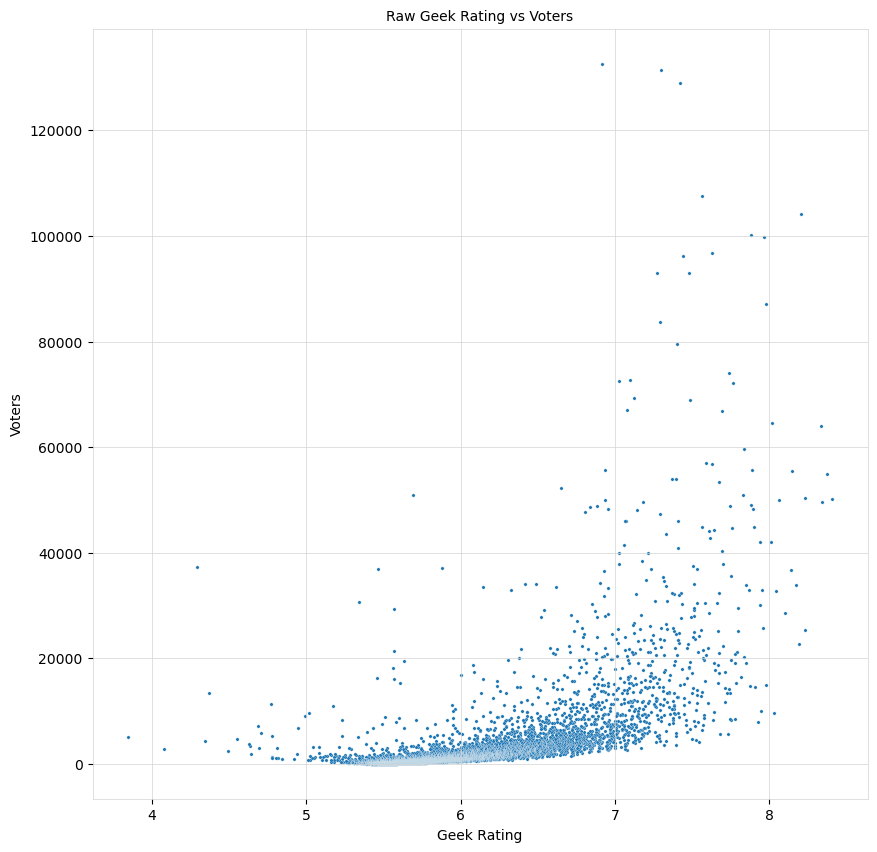

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly as px

# Assuming df is already defined and contains the data
plt.figure(figsize=(10,10))
sns.scatterplot(
    data=df,
    x='Geek Rating',
    y='Voters',
    s=6,  # Make each point smaller
    alpha=1 # Add transparency for overlapping points
)

plt.title('Raw Geek Rating vs Voters', fontsize=10)
plt.xlabel('Geek Rating', fontsize=10)
plt.ylabel('Voters', fontsize=10)
plt.grid(True, color='lightgrey', linewidth=0.5)

# Make the outside border of the plot thinner and lighter
for spine in plt.gca().spines.values():
    spine.set_edgecolor('lightgrey')
    spine.set_linewidth(0.5)

plt.show()

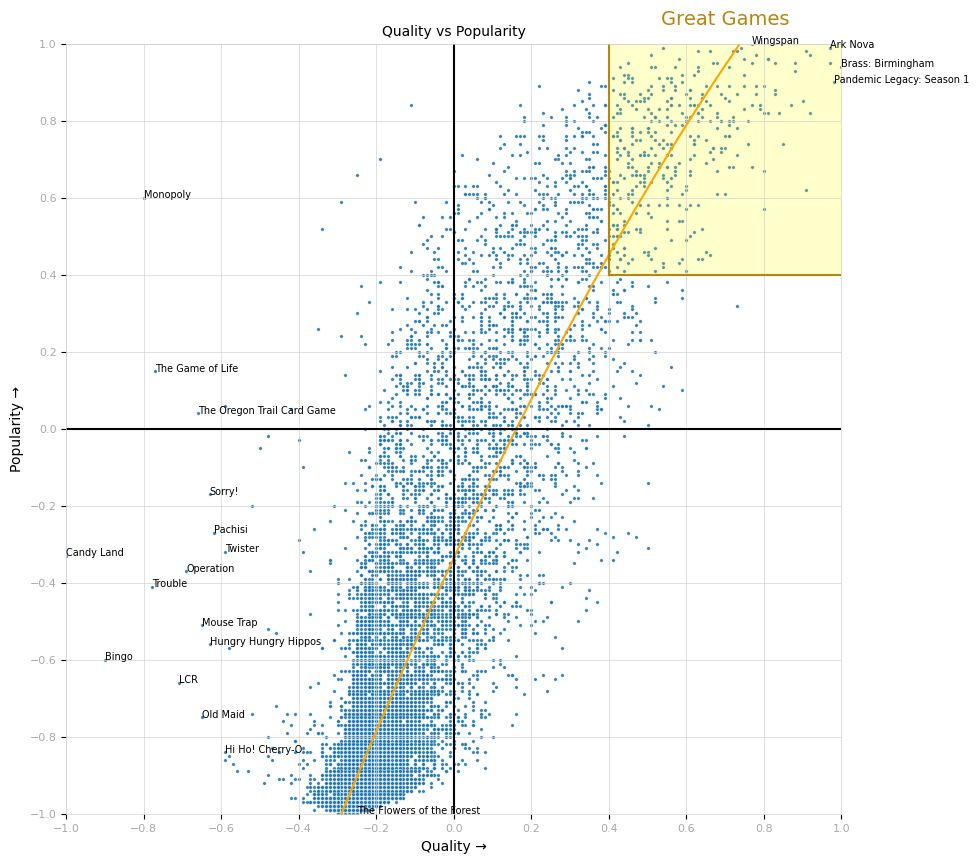

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly as px

# Assuming df is already defined and contains the data
plt.figure(figsize=(10,10))
sns.scatterplot(
    data=df,
    x='Quality',
    y='Popularity',
    s=6,  # Make each point smaller
    alpha=0.90 # Add transparency for overlapping points
)

plt.title('Quality vs Popularity', fontsize=10)
plt.xlabel('Quality →', fontsize=10)
plt.ylabel('Popularity →', fontsize=10)
plt.grid(True, color='lightgrey', linewidth=0.5)

# Make the outside border of the plot thinner and lighter
for spine in plt.gca().spines.values():
    spine.set_edgecolor('lightgrey')
    spine.set_linewidth(0.5)

# Set the scale from -1 to 1 and make each grid line interval 0.1 apart
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xticks([i * 0.2 for i in range(-5, 6)], fontsize=8, color='darkgrey')
plt.yticks([i * 0.2 for i in range(-5, 6)], fontsize=8, color='darkgrey')

# Add a curved trend line in orange
z = np.polyfit(df['Quality'], df['Popularity'], 2) # Fit a second-degree polynomial
p = np.poly1d(z)
plt.plot(df['Quality'], p(df['Quality']), color='orange')

# Make the grid line at point 0 of each axis solid black
plt.axhline(0, color='black', linewidth=1.5)
plt.axvline(0, color='black', linewidth=1.5)

# Mark the top right-hand section with gridlines to form a box
plt.plot([0.4, 0.4], [0.4, 1], color='darkgoldenrod', linewidth=1.5)
plt.plot([0.4, 1], [0.4, 0.4], color='darkgoldenrod', linewidth=1.5)

# Shade the top right-hand section with a very light yellow color
plt.fill_betweenx([0.4, 1], 0.4, 1, color='yellow', alpha=0.2)
plt.text(0.7, 1.05, 'Great Games', color='darkgoldenrod', fontsize=14, ha='center')

# Add labels to the points with highest and lowest popularity and quality
top_popularity = df.nlargest(2, 'Popularity')
bottom_popularity = df.nsmallest(1, 'Popularity')
top_quality = df.nlargest(2, 'Quality')
bottom_quality = df.nsmallest(15, 'Quality')

for _, row in pd.concat([top_popularity, bottom_popularity, top_quality, bottom_quality]).iterrows():
    plt.text(row['Quality'], row['Popularity'], row['Title'], fontsize=7)

plt.show()

There is a lot going on here, but I do think this is a very powerful visual. Lets break it down.

# The four quadrants
- **Top Left** - High Popularity, Low Quality - **Timeless Classics**
- **Top Right** - High Popularity, High Quality - **Good Games**
- **Bottom Left** - Low Popularity, Low Quality - **Starting out/Rubbish**
- **Bottom Right** - Low Popularity, High Quality - **Hidden Gems/Niche**

# The golden section - Great Games
These games have the highest popularity and quality scores and are therefore classified as the "Great Games". These will form an integral part of our statistical analysis as will be used to determine the features of a great game.

# The trend
The orange line shows the trend across all points. This tells us that as quality increases, a games popularity also increases. More people are interested in a good game! Although I'm sure that's not new information. Good to see that this expectation is met though, and it build trust in the classification process we have used for Popularity and Quality.


# This looked cool

Here I have filled in a few more sections of the scatter plot, just out of interest really. 

![Scatter_Coloured](../images/Scatter_Coloured.png)

# Plotting each games percentile

![Percentile_Plot](../images/Percentile_Plot.png)

I think there are 2 interesting call-outs when plotting the data as percentiles.

![Percentile_Plot_Anot](../images/Percentile_Plot_Anot.png)

- Firstly, the green line. This tells us that as a games quality increases, so does it's popularity, as you might expect. People generally prefer good things right?
- However, the orange line tells an interesting story. Again, as quality increases, so does popularity. However, the popularity also increases in the case of a very poor quality game when looking at the already popular games. This is likely down to the nature under which someone feels compelled to leave a review, typically if something is really good, or really bad. 